In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

### Creating pretrained model instance

Model detection

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# img = 'https://ultralytics.com/images/zidane.jpg'
dir_path = os.path.dirname(os.path.abspath('__file__'))
img_path = f'{dir_path}/images/'
img1 = f'{img_path}/1.jpeg'
img2 = f'{img_path}/2.jpeg'

results = model(img2)

# %matplotlib inline
# plt.imshow(np.squeeze(results.render()))
# plt.show()
print(results)

Using cache found in C:\Users\sudip/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-20 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 183x275 22 cars, 5 trucks
Speed: 91.8ms pre-process, 62.8ms inference, 62.8ms NMS per image at shape (1, 3, 448, 640)


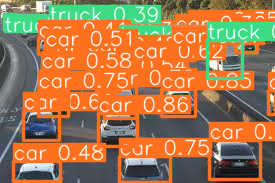

None
torch.Size([1, 183, 275, 3])


In [3]:
# show the image
print(results.show())

# get the files
# results.files

img_tensor = torch.tensor(results.ims, dtype=torch.float32, device=torch.device('cpu'))
print(img_tensor.shape)
 

#### Real time detections

In [4]:
# matplotlib.use('Agg')
cap = cv2.VideoCapture(0)
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    # show video
    # cv2.imshow('YOLO', frame)
    

    # show a single frame image
    # %matplotlib inline
    # plt.imshow(np.squeeze(frame))
    # plt.show()

    # run yolo model
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    # if i > 0:
    #     break
    i = i + 1

cap.release()
cv2.destroyAllWindows()
    

KeyboardInterrupt: 

### Train

In [6]:
import uuid
import os
import time

In [7]:
dir_path = os.path.dirname(os.path.abspath('__file__'))

IMAGE_PATH = os.path.join(dir_path, 'images/data/')
labels = ['awake', 'drowsy']
number_imgs = 20

In [9]:
cap = cv2.VideoCapture(0)

if cap.isOpened():
    for label in labels:
    # print("Collecting images for {}".format(label))
        time.sleep(2)

        # loop through image range
        for img_num in range(number_imgs):
            print('Collecting images for {}, image number {}'.format(label, img_num))
    
            ret, frame = cap.read()
            imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
    
            # write image to file
            cv2.imwrite(imgname, frame)
            cv2.imshow('Image collection', frame)
            time.sleep(2)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()



In [10]:
for label in labels:
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image no {}'.format(label, img_num))
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8221-a026-11ee-a49c-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8222-a026-11ee-87d3-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8223-a026-11ee-b94c-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8224-a026-11ee-b99e-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8225-a026-11ee-862d-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8226-a026-11ee-908b-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8227-a026-11ee-9d1a-f82819ae12a6.jpg
D:\project-files\JupyterNotebookFiles\machine-learning\yolo-detect\images/data/awake.659f8228-a026-11ee-9b98-f82819ae1

In [11]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc -o libs/resources.py resources.qrc

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/00/c3/0e6e18ac7fbf9687440c7d54fb2f39055d61ade32545ab305e7e3186be73/lxml-4.9.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/8e/e2/d296cb17bae19ba49137a2649934a70d5f48cc99b7daa6ce9cf1aecddfeb/PyQt5_sip-12.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
     --------------------------------------- 0.0/50.1 MB 217.9 kB/s eta 0:03:50
 

ERROR: Exception:
Traceback (most recent call last):
  File "C:\dev\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\dev\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\dev\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\dev\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\dev\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\dev\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\dev\anaconda3\Lib\ssl.py", l

In [13]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 10 --data dataset.yaml --weights yolov5.pt --workers 2

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--images IMAGES]
                [--hyp HYP] [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--imgsz IMGSZ] [--rect] [--resume [RESUME]] [--nosave]
                [--noval] [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--entity ENTITY]
                [--upload_dataset [UPLOAD_DATASET]]
                [--bbox_interval BBOX_INTERVAL]
                [--artifact_alias ARTIFACT_ALIAS]
train.py: error: unrecog